# Neural network

In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from keras.callbacks import TensorBoard
from time import time

Using TensorFlow backend.


In [2]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    seed = 7
    np.random.seed(seed)
    train, validation = train_test_split(train, test_size=0.2, random_state=seed)    
    return train,validation 

In [3]:
train , validation = get_data()
train_target = train.Servidas
train.drop(['Servidas'],axis = 1 , inplace = True)
validation_target=validation.Servidas
validation.drop(['Servidas'],axis = 1 , inplace = True)

In [4]:
NN_model = Sequential()

In [5]:
# Input layer
NN_model.add(Dense(129, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

In [6]:
# hidden layer
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [7]:
# Out Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [8]:
# Compile layer
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 129)               16770     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33280     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 181,891
Trainable params: 181,891
Non-trainable params: 0
_________________________________________________________________


In [14]:
tbCallBack = TensorBoard(log_dir="/home/juliomb/alrac/Proyecto/logs".format(time()), write_graph=True)
NN_model.fit(train, train_target, epochs=200, batch_size=32,callbacks=[tbCallBack])

Epoch 1/200
2578/2578 [==============================] - 0s 83us/step - loss: 220.0828 - mean_absolute_error: 220.0828
Epoch 2/200
2578/2578 [==============================] - 0s 79us/step - loss: 216.3902 - mean_absolute_error: 216.3902
Epoch 3/200
2578/2578 [==============================] - 0s 83us/step - loss: 196.4975 - mean_absolute_error: 196.4975
Epoch 4/200
2578/2578 [==============================] - 0s 83us/step - loss: 201.0235 - mean_absolute_error: 201.0235
Epoch 5/200
2578/2578 [==============================] - 0s 81us/step - loss: 229.6266 - mean_absolute_error: 229.6266
Epoch 6/200
2578/2578 [==============================] - 0s 80us/step - loss: 222.8502 - mean_absolute_error: 222.8502
Epoch 7/200
2578/2578 [==============================] - 0s 82us/step - loss: 212.9985 - mean_absolute_error: 212.9985
Epoch 8/200
2578/2578 [==============================] - 0s 83us/step - loss: 213.6662 - mean_absolute_error: 213.6662
Epoch 9/200
2578/2578 [=========================

2578/2578 [==============================] - 0s 84us/step - loss: 187.3298 - mean_absolute_error: 187.3298
Epoch 70/200
2578/2578 [==============================] - 0s 80us/step - loss: 197.7898 - mean_absolute_error: 197.7898
Epoch 71/200
2578/2578 [==============================] - 0s 83us/step - loss: 192.6612 - mean_absolute_error: 192.6612
Epoch 72/200
2578/2578 [==============================] - 0s 78us/step - loss: 179.5184 - mean_absolute_error: 179.5184
Epoch 73/200
2578/2578 [==============================] - 0s 81us/step - loss: 164.6943 - mean_absolute_error: 164.6943
Epoch 74/200
2578/2578 [==============================] - 0s 85us/step - loss: 208.9315 - mean_absolute_error: 208.9315
Epoch 75/200
2578/2578 [==============================] - 0s 77us/step - loss: 181.6505 - mean_absolute_error: 181.6505
Epoch 76/200
2578/2578 [==============================] - 0s 79us/step - loss: 175.8934 - mean_absolute_error: 175.8934
Epoch 77/200
2578/2578 [=============================

2578/2578 [==============================] - 0s 83us/step - loss: 174.3369 - mean_absolute_error: 174.3369
Epoch 138/200
2578/2578 [==============================] - 0s 80us/step - loss: 168.3308 - mean_absolute_error: 168.3308
Epoch 139/200
2578/2578 [==============================] - 0s 79us/step - loss: 155.6168 - mean_absolute_error: 155.6168
Epoch 140/200
2578/2578 [==============================] - 0s 80us/step - loss: 159.5317 - mean_absolute_error: 159.5317
Epoch 141/200
2578/2578 [==============================] - 0s 82us/step - loss: 160.5720 - mean_absolute_error: 160.5720
Epoch 142/200
2578/2578 [==============================] - 0s 80us/step - loss: 170.8517 - mean_absolute_error: 170.8517
Epoch 143/200
2578/2578 [==============================] - 0s 82us/step - loss: 192.9145 - mean_absolute_error: 192.9145
Epoch 144/200
2578/2578 [==============================] - 0s 79us/step - loss: 168.9594 - mean_absolute_error: 168.9594
Epoch 145/200
2578/2578 [=====================

In [15]:
def my_r2_score(v_true, v_pred):
    ssres = np.sum(np.square(v_true - v_pred))
    sstot = np.sum(np.square(v_true - np.mean(v_true)))
    return 1 - ssres / sstot

In [16]:
val_pre=NN_model.predict(validation,batch_size=32)
score = NN_model.evaluate(validation, validation_target, batch_size=32)
print('MAE = ', score[0])
print('R2 = ', my_r2_score(validation_target.values.reshape((validation_target.shape[0],1)),val_pre))

645/645 [==============================] - 0s 39us/step
MAE =  482.591388933
R2 =  0.911075849796


In [17]:
# Plot the results
validation_=validation.values[100:110,:]
validation_target_=validation_target.values.reshape((validation_target.shape[0],1))[100:110,:]
predict1_=val_pre[100:110,:]
validation_reduced = PCA(n_components=1).fit_transform(validation_)

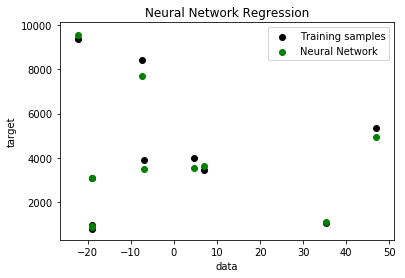

In [18]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="Neural Network")
#plt.scatter(validation_reduced, predict2_, c="r", label="n_estimators=300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Neural Network Regression")
plt.legend()
plt.show()